# This is a notebook for messing with parameter distributions to get "tight" and "wide" simulations

### Load dependencies

In [1]:
import os
import json
import sympy
import requests

import pyciemss
import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

from mira.metamodel import *
from mira.modeling.amr.petrinet import AMRPetriNetModel, template_model_to_petrinet_json
from mira.sources.amr.petrinet import template_model_from_amr_json

/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/threadpoolctl.py:1223: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


### Grab a few models

In [13]:
MODEL_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/models/"

model1 = os.path.join(MODEL_PATH, "SEIRD_base_model01_petrinet.json")
model2 = os.path.join(MODEL_PATH, "SEIRHD_base_model01_petrinet.json")
model3 = os.path.join(MODEL_PATH, "LV_sheep_foxes.json")

### Set parameters for sampling

In [14]:
start_time = 0.0
end_time = 100.0
logging_step_size = 1
num_samples = 300

## Sample the model

In [16]:
import numpy as np
name = "wide_pyciemms"
def save_result(data, name, ref_ext):
    """Save new reference files"""
    _output_root = 'output'
    mode = "w" if ref_ext == "svg" else "wb"
    with open(os.path.join(_output_root, f"{name}.{ref_ext}"), mode) as f:
        f.write(data)

result1 = pyciemss.sample(model1, end_time, logging_step_size, num_samples, start_time=start_time)
kmean = True
n_clusters = 3
distribution = result1["data"][['timepoint_id', 'sample_id', "E_state"]]

#change kmean here to use clustering
examplary_line, trajectory_dict = pyciemss.visuals.trajectories.select_traces(distribution, kmean= kmean, n_clusters = n_clusters, select_by_list = ['mean', 'granger', "variance", 'chaos'])


for cluster in list(np.unique(examplary_line['cluster'])): 
        cluster_sample_id = trajectory_dict[cluster.lower()]['cluster_sample_id']  
        cluster_distribution =  distribution[distribution["sample_id"].isin(cluster_sample_id)]
        cluster_distribution = cluster_distribution.reset_index()
        print(len(cluster_sample_id))
        # get examplary lines form that cluster
        current_cluster_df = examplary_line[examplary_line['cluster'] == cluster]
        current_cluster_df = current_cluster_df.reset_index()

        # get right format to use as traces
        examplary_lines_pivot = current_cluster_df[['examplary_line', 'mean_trajectory', 'timepoint', 'select_by']].pivot_table(
        values="examplary_line", index = ["timepoint", 'mean_trajectory'], columns="select_by")
        examplary_lines_pivot = examplary_lines_pivot.reset_index()
        examplary_lines_pivot = examplary_lines_pivot.rename(columns = {'mean_trajectory': 'Baseline_Mean'})

        # plot the traces along with the baselines
        schema = plots.trajectories(cluster_distribution[['timepoint_id', 'sample_id', 'E_state']], traces = examplary_lines_pivot)
        path = "{}_{}".format(name, cluster)
        image = plots.ipy_display(schema, format="PNG").data
        save_result(image, path, "png")
        plots.ipy_display(schema, format="interactive")

Init 1


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


809529781797.766 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


298428132622.651 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


286779627303.178 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


283194761171.593 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


283194761171.593 --> 
Init 2


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


951302402548.432 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


331028260892.911 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


320761299847.986 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


306014291096.742 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


301483659897.273 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


300650850842.497 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


300650850842.497 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s



Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.4175  , p=0.1915  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=18.5522 , p=0.0463  , df=10
likelihood ratio test: chi2=16.8512 , p=0.0777  , df=10
parameter F test:         F=1.4155  , p=0.1924  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8936  , p=0.0611  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=24.7834 , p=0.0058  , df=10
likelihood ratio test: chi2=21.8637 , p=0.0158  , df=10
parameter F test:         F=1.8925  , p=0.0612  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=30.8348 , p=0.0000  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=403.5730, p=0.0000  , df=10
likelihood ratio test: chi2=152.2796, p=0.0000  , df=10
parameter F test:         F=30.8348 , p=0.0000  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=74.8394 , 

/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


parameter F test:         F=8.5931  , p=0.0000  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.0547  , p=0.0406  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=26.8928 , p=0.0027  , df=10
likelihood ratio test: chi2=23.4986 , p=0.0090  , df=10
parameter F test:         F=2.0511  , p=0.0410  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.5994  , p=0.0098  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=34.0211 , p=0.0002  , df=10
likelihood ratio test: chi2=28.8111 , p=0.0013  , df=10
parameter F test:         F=2.5949  , p=0.0100  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=11.3516 , p=0.0000  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=148.5725, p=0.0000  , df=10
likelihood ratio test: chi2=87.3834 , p=0.0000  , df=10
parameter F test:         F=11.3518 , p=0.0000  , df_denom=68, df_num=10

Granger Cau

/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


parameter F test:         F=128.0124, p=0.0000  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=283.1968, p=0.0000  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=3706.5458, p=0.0000  , df=10
likelihood ratio test: chi2=334.0123, p=0.0000  , df=10
parameter F test:         F=283.1965, p=0.0000  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.4342  , p=0.0152  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=31.8588 , p=0.0004  , df=10
likelihood ratio test: chi2=27.2328 , p=0.0024  , df=10
parameter F test:         F=2.4355  , p=0.0151  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=5.6557  , p=0.0000  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=74.0228 , p=0.0000  , df=10
likelihood ratio test: chi2=53.8676 , p=0.0000  , df=10
parameter F test:         F=5.6516  , p=0.0000  , df_denom=68, df_num=10

Granger Ca

/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


parameter F test:         F=1.8424  , p=0.0694  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=86.5289 , p=0.0000  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=1132.5107, p=0.0000  , df=10
likelihood ratio test: chi2=233.1095, p=0.0000  , df=10
parameter F test:         F=86.5291 , p=0.0000  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9650  , p=0.0038  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=38.8066 , p=0.0000  , df=10
likelihood ratio test: chi2=32.2075 , p=0.0004  , df=10
parameter F test:         F=2.9637  , p=0.0038  , df_denom=68, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=205.0853, p=0.0000  , df_denom=68, df_num=10
ssr based chi2 test:   chi2=2684.2040, p=0.0000  , df=10
likelihood ratio test: chi2=306.0819, p=0.0000  , df=10
parameter F test:         F=205.0853, p=0.0000  , df_denom=68, df_num=10

Granger C

34



36




Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.9952  , p=0.0003  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=52.4748 , p=0.0000  , df=10
likelihood ratio test: chi2=41.1568 , p=0.0000  , df=10
parameter F test:         F=3.9952  , p=0.0003  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=4.0008  , p=0.0003  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=52.5476 , p=0.0000  , df=10
likelihood ratio test: chi2=41.2024 , p=0.0000  , df=10
parameter F test:         F=4.0008  , p=0.0003  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.2605  , p=0.0241  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=29.6904 , p=0.0010  , df=10
likelihood ratio test: chi2=25.5834 , p=0.0043  , df=10
parameter F test:         F=2.2605  , p=0.0241  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.8925  , 

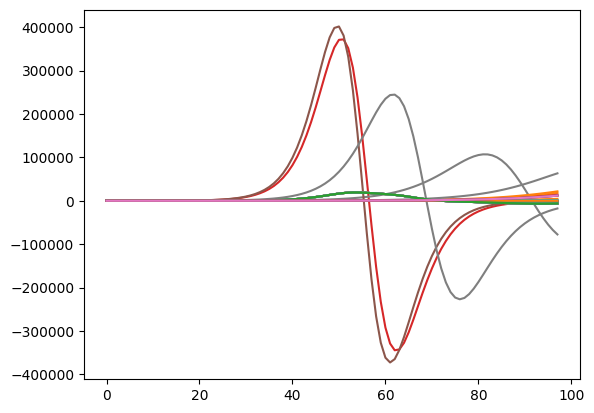


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.8442  , p=0.0004  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=50.4903 , p=0.0000  , df=10
likelihood ratio test: chi2=39.9048 , p=0.0000  , df=10
parameter F test:         F=3.8441  , p=0.0004  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.2982  , p=0.9793  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=3.9164  , p=0.9510  , df=10
likelihood ratio test: chi2=3.8318  , p=0.9546  , df=10
parameter F test:         F=0.2982  , p=0.9793  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.7356  , p=0.0907  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=22.7957 , p=0.0115  , df=10
likelihood ratio test: chi2=20.2709 , p=0.0268  , df=10
parameter F test:         F=1.7356  , p=0.0907  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.0342  , 

/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '



Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.9903  , p=0.0481  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=26.1407 , p=0.0036  , df=10
likelihood ratio test: chi2=22.8883 , p=0.0112  , df=10
parameter F test:         F=1.9902  , p=0.0481  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.1943  , p=0.3107  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=15.6864 , p=0.1090  , df=10
likelihood ratio test: chi2=14.4350 , p=0.1541  , df=10
parameter F test:         F=1.1943  , p=0.3107  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=3.6635  , p=0.0006  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=48.1175 , p=0.0000  , df=10
likelihood ratio test: chi2=38.3840 , p=0.0000  , df=10
parameter F test:         F=3.6635  , p=0.0006  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.0359  , 

/Users/oost464/opt/anaconda3/envs/pyciems310/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '



Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.0228  , p=1.0000  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=0.2990  , p=1.0000  , df=10
likelihood ratio test: chi2=0.2985  , p=1.0000  , df=10
parameter F test:         F=0.0228  , p=1.0000  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.8273  , p=0.6039  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=10.8663 , p=0.3680  , df=10
likelihood ratio test: chi2=10.2459 , p=0.4192  , df=10
parameter F test:         F=0.8273  , p=0.6039  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.0319  , p=1.0000  , df_denom=67, df_num=10
ssr based chi2 test:   chi2=0.4189  , p=1.0000  , df=10
likelihood ratio test: chi2=0.4179  , p=1.0000  , df=10
parameter F test:         F=0.0319  , p=1.0000  , df_denom=67, df_num=10

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.9856  , 

select_by,timepoint,Baseline_Trajectory_Mean,Chaos,Granger_2/100,Mean,Variance
0,0,34.997600,35.931900,35.931900,39.095264,39.095264
1,1,32.992410,37.634674,37.634674,40.508400,40.508400
2,2,32.810295,43.537037,43.537037,43.367226,43.367226
3,3,33.847662,53.081142,53.081142,47.226337,47.226337
4,4,35.810169,66.339035,66.339035,51.871483,51.871483


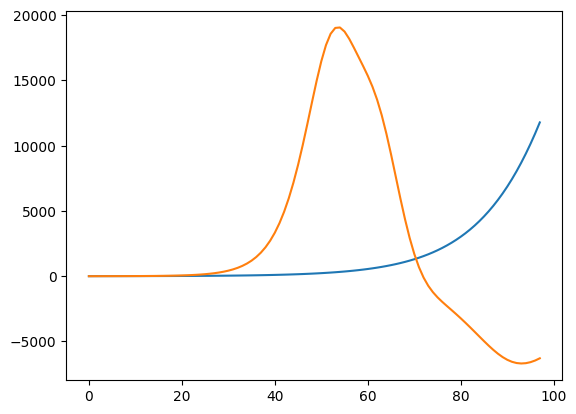

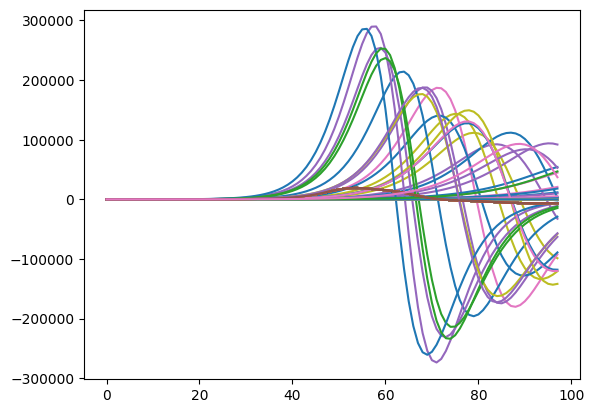

In [ ]:
def save_result(data, name, ref_ext):
    """Save new reference files"""
    _output_root = 'output'
    mode = "w" if ref_ext == "svg" else "wb"
    with open(os.path.join(_output_root, f"{name}.{ref_ext}"), mode) as f:
        f.write(data)

result1 = pyciemss.sample(model1, end_time, logging_step_size, num_samples, start_time=start_time)

distribution = result1["data"][['timepoint_id', 'sample_id', "E_state"]]
# Plot results for all states
# schema = plots.trajectories(result1["data"], keep=".*_state")
examplary_line, trajectory_dict = pyciemss.visuals.trajectories.select_traces(distribution, kmean=True, n_cluster = 3)
examplary_line = examplary_line.reset_index()
examplary_lines_pivot = examplary_line[['examplary_line', 'mean_trajectory', 'timepoint', 'select_by']].pivot_table(
values="examplary_line", index = ["timepoint", 'mean_trajectory'], columns="select_by"
)
examplary_lines_pivot = examplary_lines_pivot.reset_index()

examplary_lines_pivot = examplary_lines_pivot.rename(columns = {'mean_trajectory': 'Baseline_Trajectory_Mean'})
display(examplary_lines_pivot.head())
schema = plots.trajectories(distribution, traces = examplary_lines_pivot, keep=["E_state", "I_state", "R_state", "D_state"])
path = "{}".format("wide")
image = plots.ipy_display(schema, format="PNG").data
save_result(image, path, "png")
plots.ipy_display(schema, format="interactive")

## Change parameter values and uncertainty from the AMR

### Load the model as a template model (from the url)

In [25]:
response = requests.get(model1)
tm = template_model_from_amr_json(json.loads(response.text))

# Print parameters
tm.parameters

{'beta': Parameter(name='beta', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=1/day), value=0.4, distribution=Distribution(type='Uniform1', parameters={'minimum': 0.05, 'maximum': 0.8})),
 'total_population': Parameter(name='total_population', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=person), value=19340000.0, distribution=None),
 'I0': Parameter(name='I0', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=person), value=10.0, distribution=Distribution(type='Uniform1', parameters={'minimum': 1.0, 'maximum': 15.0})),
 'delta': Parameter(name='delta', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=1/day), value=0.25, distribution=None),
 'death': Parameter(name='death', display_name=None, description=None, identifiers={}, context={}, units=Unit(expression=1/day), value=0.007, distribution=Distribution(type='Uniform1', paramete

### Change parameter values and distributions

In [26]:
# Change `beta` parameter value
tm.parameters["beta"].value = 0.2
# Tighten `beta` distribution
tm.parameters["beta"].distribution = Distribution(type='StandardUniform1',
                                                 parameters={'minimum': 0.199, 'maximum': 0.201})

# Change `gamma` parameter value
tm.parameters["gamma"].value = 0.25
# Remove `gamma` distribution
tm.parameters["gamma"].distribution = None

# Remove `I0` distribution
tm.parameters["I0"].distribution = None
# Remove `death` distribution
tm.parameters["death"].distribution = None

# Save as updated AMR
with open('update_parameters_example.json', 'w') as fh:
    json.dump(template_model_to_petrinet_json(tm), fh, indent=1)

### Sample the updated model

,timepoint_id,sample_id,persistent_beta_param,D_state,E_state,I_state,R_state,S_state,infected_observable_state,dead_observable_state
0,0,0,0.200574,0.357561,18.996298,20.905010,50.722603,19339952.0,20.905010,0.357561
1,1,0,0.200574,0.681375,14.533072,16.222563,96.657867,19339918.0,16.222563,0.681375
2,2,0,0.200574,0.931293,11.196672,12.500331,132.110550,19339886.0,12.500331,0.931293
3,3,0,0.200574,1.123860,8.626892,9.631388,159.426697,19339862.0,9.631388,1.123860
4,4,0,0.200574,1.272223,6.646925,7.420871,180.474014,19339846.0,7.420871,1.272223


select_by,timepoint,Baseline_Trajectory_Mean,Chaos_100/100,Mean,Variance_10/100
0,0,18.931384,18.820234,18.931973,18.931973
1,1,14.436426,14.271196,14.437161,14.437161
2,2,11.086792,10.899256,11.087448,11.087448
3,3,8.515131,8.324689,8.515594,8.515594
4,4,6.540056,6.358282,6.540329,6.540329


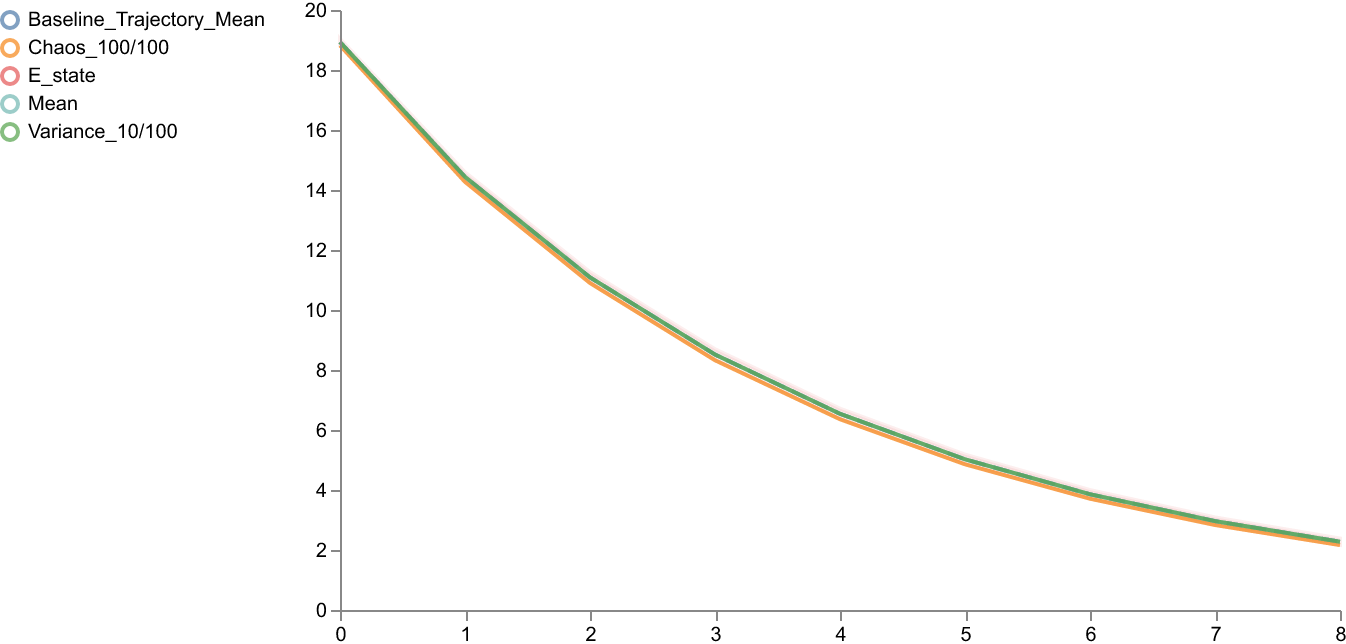

In [27]:
updated_model = "update_parameters_example.json"
result1 = pyciemss.sample(updated_model, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

# Plot results for all states
# schema = plots.trajectories(result1["data"], keep=".*_state")
distribution = result1["data"][['timepoint_id', 'sample_id', "E_state"]]
# Plot results for all states
# schema = plots.trajectories(result1["data"], keep=".*_state")
examplary_line, trajectory_dict = pyciemss.visuals.trajectories.select_traces(distribution, kmean=False)
examplary_line = examplary_line.reset_index()
examplary_lines_pivot = examplary_line[['examplary_line', 'mean_trajectory', 'timepoint', 'select_by']].pivot_table(
values="examplary_line", index = ["timepoint", 'mean_trajectory'], columns="select_by"
)
examplary_lines_pivot = examplary_lines_pivot.reset_index()

examplary_lines_pivot = examplary_lines_pivot.rename(columns = {'mean_trajectory': 'Baseline_Trajectory_Mean'})
display(examplary_lines_pivot.head())
schema = plots.trajectories(distribution, traces = examplary_lines_pivot, keep=["E_state", "I_state", "R_state", "D_state"])
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

### Change parameters again (from the local model)

In [4]:
filename = updated_model
with open(filename, 'r') as fh:
    tm = template_model_from_amr_json(json.load(fh))

# Change `beta` parameter value
tm.parameters["beta"].value = 0.25

# Change `beta` distribution
tm.parameters["beta"].distribution = Distribution(type='StandardUniform1',
                                                 parameters={'minimum': 0.23, 'maximum': 0.27})

# Save as updated AMR
with open("updated_update_parameters_example.json", "w") as fh:
    json.dump(template_model_to_petrinet_json(tm), fh, indent=1)

### Sample the updated model

,timepoint_id,sample_id,timepoint_unknown,persistent_beta_param,D_state,E_state,I_state,R_state,S_state,infected_observable_state,dead_observable_state
0,0,0,10.0,0.24444,0.382125,24.360712,24.425217,54.207100,19339940.0,24.425217,0.382125
1,1,0,20.0,0.24444,0.805098,23.588255,23.853611,114.208855,19339880.0,23.853611,0.805098
2,2,0,30.0,0.24444,1.216764,22.937059,23.196529,172.606598,19339822.0,23.196529,1.216764
3,3,0,40.0,0.24444,1.617079,22.304430,22.556786,229.394211,19339766.0,22.556786,1.617079
4,4,0,50.0,0.24444,2.006352,21.689129,21.934658,284.615692,19339712.0,21.934658,2.006352


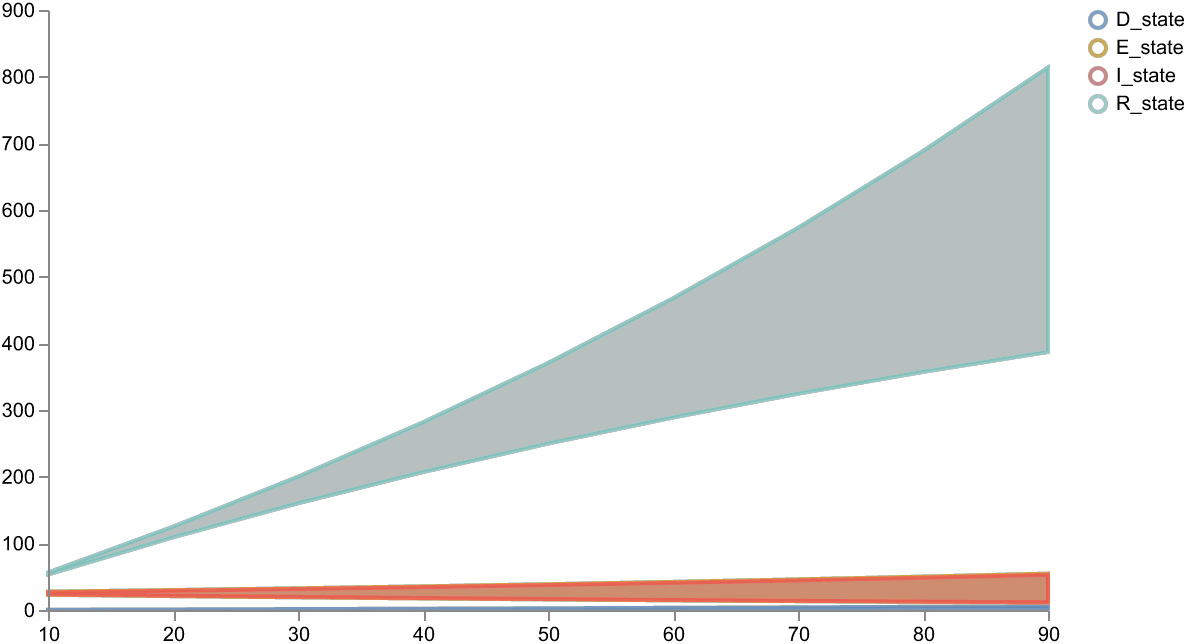

In [5]:
updated_model = "updated_update_parameters_example.json"
result1 = pyciemss.sample(updated_model, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

# Plot results for all states
# schema = plots.trajectories(result1["data"], keep=".*_state")
schema = plots.trajectories(result1["data"], keep=["E_state", "I_state", "R_state", "D_state"])
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)